### Practice Random Forest

In [31]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
#printing of multiple outputs from a cell
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [32]:
#import csv files into dataframes census and school
df_raw=pd.read_csv("folder4/census.csv",na_values=['NP',' ','SUPP','NE','LOWCOV',None])
df_school_raw=pd.read_csv("folder4/england_ks4final.csv",na_values=['NP',' ','SUPP','LOWCOV','NE',None],low_memory=False)

In [33]:
#now let's have a look at them:
df_raw.head()
df_school_raw.head()

,URN,LA,ESTAB,NOR,NORG,NORB,PNORG,PNORB,TSENELSE,PSENELSE,...,PSENELK,NUMEAL,NUMENGFL,NUMUNCFL,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSM,NUMFSMEVER,PNUMFSMEVER
0,100000,201,3614.0,250.0,119.0,131.0,47.6,52.4,7.0,2.8,...,16.0,99.0,71.0,6.0,56.3,40.3,3.4,21.1,59.0,28.6
1,100001,201,6005.0,730.0,730.0,0.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,100002,201,6006.0,253.0,105.0,148.0,41.5,58.5,1.0,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,100003,201,6007.0,918.0,0.0,918.0,0.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,100463,201,6354.0,204.0,100.0,104.0,49.0,51.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


,RECTYPE,ALPHAIND,LEA,ESTAB,URN,SCHNAME,SCHNAME_AC,ADDRESS1,ADDRESS2,ADDRESS3,...,TAVENT_GAV_PTQ_EE,TAVENT_GHI_PTQ_EE,TAVENT_GFSM6CLA1A_PTQ_EE,TAVENT_GNFSM6CLA1A_PTQ_EE,TAVENT_GFSM_13,TAVENT_GNFSM_13,TAVENT_GFSM_14_PTQ,TAVENT_GNFSM_14_PTQ,TAVENT_GFSM6CLA1A_15_PTQ_EE,TAVENT_GNFSM6CLA1A_15_PTQ_EE
0,1,11828.0,201.0,6007.0,100003.0,City of London School,NaN,Queen Victoria Street,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,11830.0,201.0,6005.0,100001.0,City of London School for Girls,NaN,St Giles' Terrace,Barbican,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,368.0,202.0,4285.0,100053.0,Acland Burghley School,NaN,Burghley Road,NaN,NaN,...,8.9,9.8,8.4,9.5,8.1,9.8,9.0,10.2,8.4,10.6
4,1,9318.0,202.0,4611.0,100054.0,The Camden School for Girls,NaN,Sandall Road,NaN,NaN,...,8.2,10.2,7.8,9.8,8.6,9.3,7.3,8.6,7.5,8.9


In [34]:
#practice dropping nulls on new datframe
ValList = ('IND','INDSPEC')  #independent schools
df_Int=df_school_raw
df_Ref=df_Int[~df_Int.NFTYPE.isin(ValList)]
cols_of_int =['ESTAB','URN','NFTYPE','P8MEA']
df_Ref[cols_of_int].isnull().sum()

ESTAB     154
URN       154
NFTYPE    154
P8MEA     619
dtype: int64

In [35]:
df_Ref=df_Ref.dropna(subset=[cols_of_int])
df_Ref.shape

(3506, 372)

In [36]:
#in order to join both dataframes make URN in df_Raw an int
df_Ref['URN'].dtypes

dtype('float64')

In [37]:
df_raw['URN'].dtypes

dtype('O')

In [38]:
df_raw['URN']=pd.to_numeric(df_raw['URN'], errors = 'coerce')
df_raw['URN'].dtypes

dtype('float64')

In [39]:
#now merge dataframes
df_Data=pd.merge(left=df_raw,right=df_Ref, left_on='URN', right_on='URN')
df_Data.shape
df_Data.head()

(3475, 392)

,URN,LA,ESTAB_x,NOR,NORG,NORB,PNORG,PNORB,TSENELSE,PSENELSE,...,TAVENT_GAV_PTQ_EE,TAVENT_GHI_PTQ_EE,TAVENT_GFSM6CLA1A_PTQ_EE,TAVENT_GNFSM6CLA1A_PTQ_EE,TAVENT_GFSM_13,TAVENT_GNFSM_13,TAVENT_GFSM_14_PTQ,TAVENT_GNFSM_14_PTQ,TAVENT_GFSM6CLA1A_15_PTQ_EE,TAVENT_GNFSM6CLA1A_15_PTQ_EE
0,100049.0,202,4104.0,1227.0,497.0,730.0,40.5,59.5,51.0,4.2,...,7.9,8.4,7.6,7.8,6.3,6.7,7.4,7.6,8.1,8.7
1,100050.0,202,4166.0,1114.0,1060.0,54.0,95.2,4.8,14.0,1.3,...,8.9,9.8,8.8,9.2,9.9,10.5,9.7,10.3,9.3,10.4
2,100051.0,202,4196.0,831.0,367.0,464.0,44.2,55.8,35.0,4.2,...,9.1,9.3,8.8,9.1,7.7,8.4,8.0,6.9,8.7,9.0
3,100052.0,202,4275.0,1205.0,540.0,665.0,44.8,55.2,30.0,2.5,...,10.1,10.7,9.2,10.2,8.0,9.3,7.8,8.6,9.3,10.2
4,100053.0,202,4285.0,974.0,346.0,628.0,35.5,64.5,49.0,5.0,...,8.9,9.8,8.4,9.5,8.1,9.8,9.0,10.2,8.4,10.6


In [40]:
df_Data.drop('ESTAB_y',axis = 1, inplace = True)

In [41]:
#describe
df_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
URN,3475.0,128393.130935,13132.800031,100049.0,117521.500,136349.0,137901.500,142331.0
ESTAB_x,3475.0,4930.180144,1112.296041,2022.0,4043.000,4385.0,5411.000,7511.0
NOR,3474.0,895.446459,462.345998,10.0,603.250,904.0,1208.000,3001.0
NORG,3474.0,442.591537,286.777002,0.0,260.000,439.0,620.000,1741.0
NORB,3474.0,452.854922,276.165913,0.0,265.000,454.0,632.000,1584.0
PNORG,3474.0,46.260679,19.255905,0.0,44.900,48.6,50.800,100.0
PNORB,3474.0,53.739465,19.256056,0.0,49.200,51.4,55.100,100.0
TSENELSE,3474.0,29.160334,41.481198,0.0,8.000,16.0,30.000,399.0
PSENELSE,3474.0,13.065659,31.015732,0.0,1.000,1.7,3.100,100.0
TSENELK,3474.0,96.709269,78.744822,0.0,41.000,88.0,135.000,1372.0


In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
cmap = sns.diverging_palette(220, 10, as_cmap=True)

Axes(0.125,0.125;0.62x0.755)


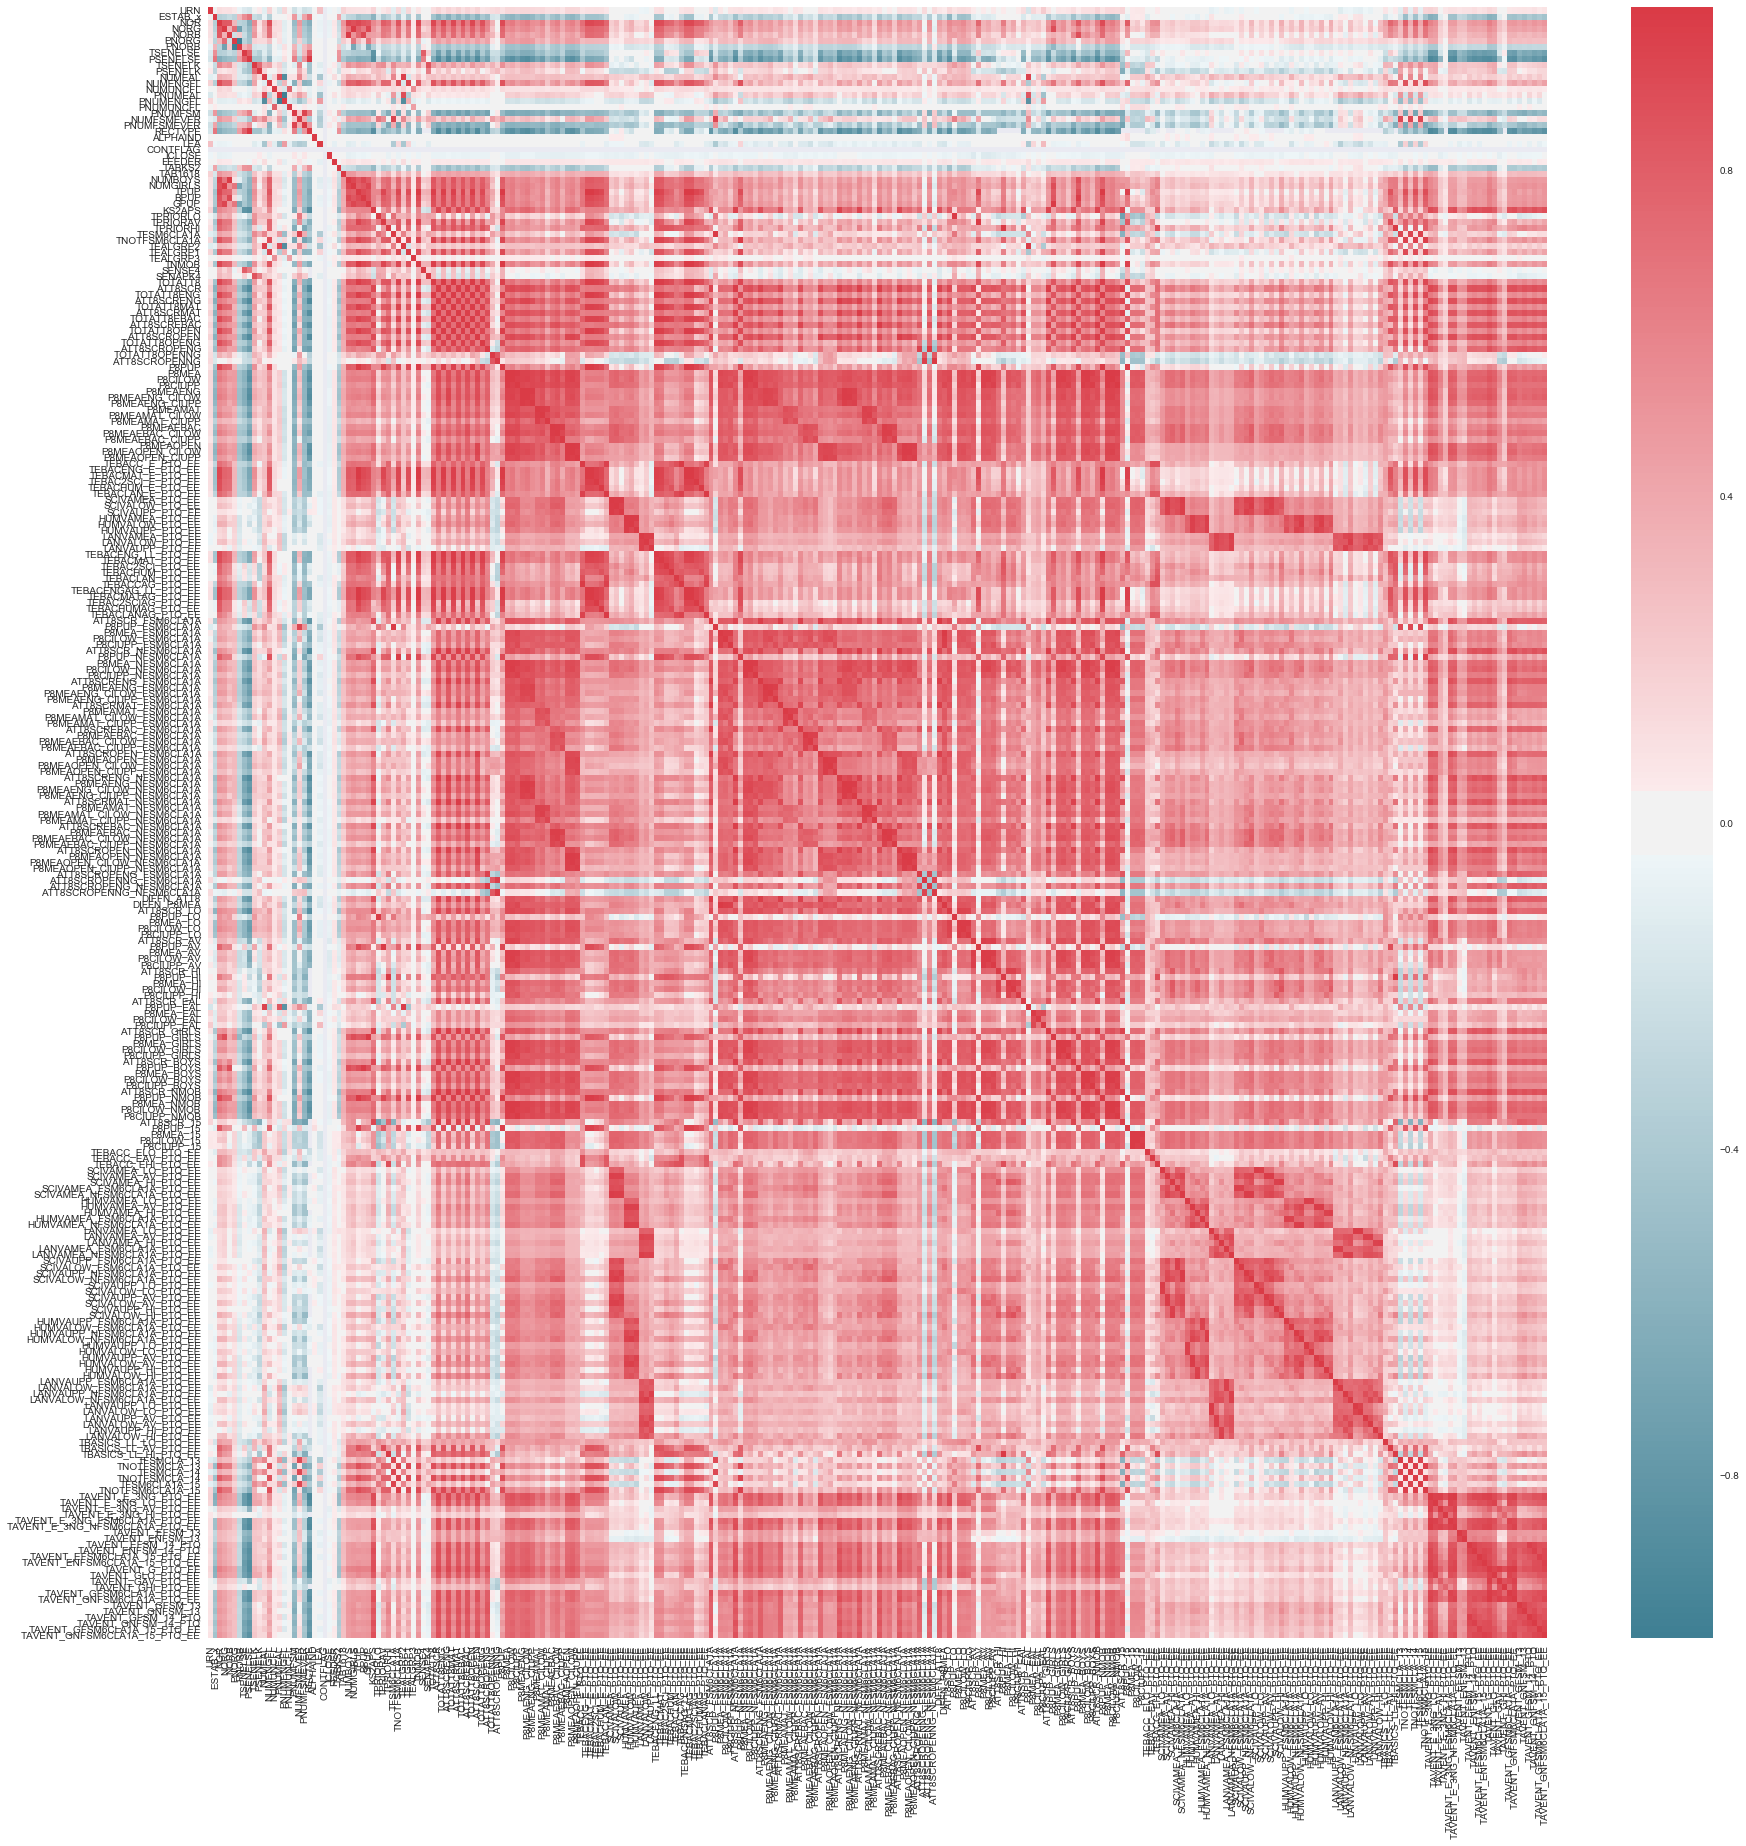

In [43]:
#maybe a heat map will make clearer
fig, ax = plt.subplots(figsize=(30,30)) 
correlations= df_Data.corr()
print sns.heatmap(correlations, cmap=cmap)

As we can see there is quite a lot of correlation between features, this was noted in the preliminary analysis too. Now to seperate out the features of interest i will run a random forest model on the whole dataset.

In [44]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

column_index(df_Data,['P8MEA'])

array([90])

In [45]:
#reindex dataframe
cols=df_Data.columns.tolist()
cols.insert(0,cols.pop(cols.index('P8MEA')))
df_working=df_Data
df_working=df_working.reindex(columns=cols)
column_index(df_working,['P8MEA'])

array([0])

In [46]:
#we want to predict progress 8 measure P8MEA based on the rest of the dataset
features=list(df_working.columns[1:])
y=df_working['P8MEA']
X=df_working[features]

In [47]:
#Need to find all colums with % in and convert to float!
df_obj=df_working.select_dtypes(include =[object])
obj_cols=df_obj.columns.tolist()
obj_cols

['LA',
 'SCHNAME',
 'SCHNAME_AC',
 'ADDRESS1',
 'ADDRESS2',
 'ADDRESS3',
 'TOWN',
 'PCODE',
 'TELNUM',
 'NFTYPE',
 'RELDENOM',
 'ADMPOL',
 'EGENDER',
 'AGERANGE',
 'CONFEXAM',
 'TOTPUPS',
 'PBPUP',
 'PGPUP',
 'PTPRIORLO',
 'PTPRIORAV',
 'PTPRIORHI',
 'PTFSM6CLA1A',
 'PTNOTFSM6CLA1A',
 'PTEALGRP2',
 'PTEALGRP1',
 'PTEALGRP3',
 'PTNMOB',
 'PSENSE4',
 'PSENAPK4',
 'P8MEACOV',
 'PTL2BASICS_LL_PTQ_EE',
 'PTL2BASICS_3YR_PTQ_EE',
 'PTEBACC_E_PTQ_EE',
 'PTEBACC_PTQ_EE',
 'PTEBACENG_E_PTQ_EE',
 'PTEBACMAT_E_PTQ_EE',
 'PTEBAC2SCI_E_PTQ_EE',
 'PTEBACHUM_E_PTQ_EE',
 'PTEBACLAN_E_PTQ_EE',
 'PTEBACENG_LL_PTQ_EE',
 'PTEBACMAT_PTQ_EE',
 'PTEBAC2SCI_PTQ_EE',
 'PTEBACHUM_PTQ_EE',
 'PTEBACLAN_PTQ_EE',
 'SCIVACOV_PTQ_EE',
 'HUMVACOV_PTQ_EE',
 'LANVACOV_PTQ_EE',
 'PTEBACCAG_PTQ_EE',
 'PTEBACENGAG_LL_PTQ_EE',
 'PTEBACMATAG_PTQ_EE',
 'PTEBAC2SCIAG_PTQ_EE',
 'PTEBACHUMAG_PTQ_EE',
 'PTEBACLANAG_PTQ_EE',
 'PTEBACC_ELO_PTQ_EE',
 'PTEBACCLO_PTQ_EE',
 'PTEBACC_EAV_PTQ_EE',
 'PTEBACCAV_PTQ_EE',
 'PTEBACC_EHI_PTQ_EE

In [48]:
df_obj.to_csv('Dataframe_cols.csv')

In [49]:
# function from stack overflow
#https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv 30Sept17
def p2f(x):
    if x is not None:
            return float(x.strip('%'))/100
    else:
        return x

In [50]:
#now force the columns with % to floats
df_check=df_obj
Objcols=df_check.columns[1:].tolist()
df_check[Objcols].head()
#df_working[Objcols]=df_working[Objcols].applymap(p2f)

,SCHNAME,SCHNAME_AC,ADDRESS1,ADDRESS2,ADDRESS3,TOWN,PCODE,TELNUM,NFTYPE,RELDENOM,...,PTFSM6CLA1ABASICS_15_PTQ_EE,PTNOTFSM6CLA1ABASICS_15_PTQ_EE,PTmultiLan_E,PTtripleSci_E,PTFSMCLA_13,PTNOTFSMCLA_13,PTFSMCLA_14,PTNOTFSMCLA_14,PTFSM6CLA1A_15,PTNOTFSM6CLA1A_15
0,Haverstock School,NaN,24 Haverstock Hill,Chalk Farm,NaN,London,NW3 2BQ,0207 2670975,CY,Does not apply,...,44%,61%,0%,0%,82%,18%,66%,34%,71%,29%
1,Parliament Hill School,NaN,Highgate Road,NaN,NaN,London,NW5 1RL,0207 4857077,CY,Does not apply,...,54%,78%,10%,35%,55%,45%,56%,44%,52%,48%
2,Regent High School,NaN,Chalton Street,Camden,NaN,London,NW1 1RX,0207 3870126,CY,Does not apply,...,42%,36%,4%,30%,78%,22%,82%,18%,72%,28%
3,Hampstead School,NaN,Westbere Road,Hampstead,NaN,London,NW2 3RT,0207 7948133,CY,Does not apply,...,50%,66%,13%,0%,50%,50%,56%,44%,59%,42%
4,Acland Burghley School,NaN,Burghley Road,NaN,NaN,London,NW5 1UJ,0207 4858515,CY,Does not apply,...,45%,71%,3%,32%,54%,46%,55%,45%,56%,44%


In [51]:
perc=[col for col in df_check if col[:2]=='PT']

In [52]:
#from https://stackoverflow.com/questions/27954343/how-to-use-pythons-str-replace-method-on-all-columns-in-a-pandas-dataframe

def f(s):
    """ convert string to float if possible """
    s = s.strip()  # remove spaces at beginning and end of string
    if s.endswith('%'):  # remove %, if exists
        s = s[:-1]
    try:
        return float(s)
    except ValueError: # converting did not work
        return s  # return original string

df_working[perc]=df_working[perc]. astype(str)
df_working[perc]=df_working[perc].applymap(f)

In [53]:
df_working[perc].head()
df_working[perc].tail()

,PTPRIORLO,PTPRIORAV,PTPRIORHI,PTFSM6CLA1A,PTNOTFSM6CLA1A,PTEALGRP2,PTEALGRP1,PTEALGRP3,PTNMOB,PTL2BASICS_LL_PTQ_EE,...,PTFSM6CLA1ABASICS_15_PTQ_EE,PTNOTFSM6CLA1ABASICS_15_PTQ_EE,PTmultiLan_E,PTtripleSci_E,PTFSMCLA_13,PTNOTFSMCLA_13,PTFSMCLA_14,PTNOTFSMCLA_14,PTFSM6CLA1A_15,PTNOTFSM6CLA1A_15
0,20.0,61.0,19.0,75.0,25.0,71.0,28.0,0.0,99.0,57.0,...,44.0,61.0,0.0,0.0,82.0,18.0,66.0,34.0,71.0,29.0
1,11.0,49.0,40.0,62.0,38.0,54.0,46.0,1.0,99.0,67.0,...,54.0,78.0,10.0,35.0,55.0,45.0,56.0,44.0,52.0,48.0
2,25.0,62.0,13.0,65.0,35.0,84.0,16.0,0.0,88.0,53.0,...,42.0,36.0,4.0,30.0,78.0,22.0,82.0,18.0,72.0,28.0
3,26.0,49.0,25.0,58.0,42.0,61.0,39.0,0.0,98.0,59.0,...,50.0,66.0,13.0,0.0,50.0,50.0,56.0,44.0,59.0,42.0
4,13.0,48.0,39.0,57.0,43.0,32.0,68.0,0.0,97.0,60.0,...,45.0,71.0,3.0,32.0,54.0,46.0,55.0,45.0,56.0,44.0


,PTPRIORLO,PTPRIORAV,PTPRIORHI,PTFSM6CLA1A,PTNOTFSM6CLA1A,PTEALGRP2,PTEALGRP1,PTEALGRP3,PTNMOB,PTL2BASICS_LL_PTQ_EE,...,PTFSM6CLA1ABASICS_15_PTQ_EE,PTNOTFSM6CLA1ABASICS_15_PTQ_EE,PTmultiLan_E,PTtripleSci_E,PTFSMCLA_13,PTNOTFSMCLA_13,PTFSMCLA_14,PTNOTFSMCLA_14,PTFSM6CLA1A_15,PTNOTFSM6CLA1A_15
3470,82.0,18.0,0.0,64.0,36.0,0.0,100.0,0.0,100.0,0.0,...,NaN,NaN,0.0,0.0,NaN,NaN,30.0,70.0,NaN,NaN
3471,100.0,0.0,0.0,50.0,50.0,18.0,82.0,0.0,91.0,0.0,...,0.0,0.0,0.0,0.0,41.0,59.0,39.0,61.0,54.0,46.0
3472,100.0,0.0,0.0,53.0,47.0,6.0,94.0,0.0,91.0,0.0,...,0.0,0.0,0.0,0.0,51.0,49.0,44.0,56.0,42.0,58.0
3473,95.0,5.0,0.0,37.0,63.0,0.0,100.0,0.0,100.0,0.0,...,0.0,0.0,0.0,0.0,50.0,50.0,37.0,63.0,33.0,67.0
3474,64.0,36.0,0.0,83.0,17.0,0.0,100.0,0.0,100.0,0.0,...,NaN,NaN,0.0,0.0,90.0,10.0,83.0,17.0,67.0,33.0


In [54]:
df_working['PTPRIORLO'].dtype

dtype('float64')

In [55]:
percList=['PBPUP','PGPUP','PSENSE4','PSENAPK4','P8MEACOV','SCIVACOV_PTQ_EE','HUMVACOV_PTQ_EE','LANVACOV_PTQ_EE','PBEBACC_E_PTQ_EE','PBEBACC_PTQ_EE','PGEBACC_E_PTQ_EE','PGEBACC_PTQ_EE','AC5EM13','AC5EM14_PTQ','AC5EM15_PTQ_EE','AC5EM16_PTQ_EE','PBL2BASICS_LL_PTQ_EE','PGL2BASICS_LL_PTQ_EE']

In [56]:
df_working[percList]=df_working[percList]. astype(str)
df_working[percList]=df_working[percList].applymap(f)

In [57]:
df_working[percList].head()

,PBPUP,PGPUP,PSENSE4,PSENAPK4,P8MEACOV,SCIVACOV_PTQ_EE,HUMVACOV_PTQ_EE,LANVACOV_PTQ_EE,PBEBACC_E_PTQ_EE,PBEBACC_PTQ_EE,PGEBACC_E_PTQ_EE,PGEBACC_PTQ_EE,AC5EM13,AC5EM14_PTQ,AC5EM15_PTQ_EE,AC5EM16_PTQ_EE,PBL2BASICS_LL_PTQ_EE,PGL2BASICS_LL_PTQ_EE
0,66.0,34.0,2.0,6.0,97.0,97.0,97.0,95.0,7.0,5.0,21.0,17.0,58.0,54.0,48.0,47.0,54.0,62.0
1,NaN,100.0,1.0,13.0,97.0,98.0,98.0,96.0,NaN,NaN,55.0,37.0,68.0,67.0,65.0,61.0,NaN,67.0
2,61.0,39.0,3.0,22.0,84.0,87.0,90.0,77.0,30.0,10.0,34.0,15.0,45.0,49.0,38.0,46.0,49.0,60.0
3,65.0,35.0,2.0,8.0,94.0,93.0,95.0,94.0,59.0,26.0,81.0,45.0,63.0,53.0,55.0,52.0,53.0,70.0
4,63.0,37.0,5.0,5.0,98.0,100.0,99.0,99.0,42.0,31.0,44.0,29.0,57.0,57.0,56.0,53.0,63.0,56.0


In [65]:
df_working=df_working.drop('CONFEXAM',axis=1)

In [68]:
cols_to_drop=['SCHNAME','SCHNAME_AC','ADDRESS1','ADDRESS2','ADDRESS3','TOWN','PCODE','TELNUM','CONTFLAG','RELDENOM','AGERANGE']

In [70]:
df_work2=df_working.drop(cols_to_drop,axis=1)

In [73]:
#need to get dummies for the columns i am leaviung in!
Gender=pd.get_dummies(df_work2['EGENDER'],prefix='Gender')
ADMPol=pd.get_dummies(df_work2['ADMPOL'],prefix='AdmitPol')

TypeError: drop() got an unexpected keyword argument 'xis'

In [74]:
#drop columns that are text
df_work2.drop('NFTYPE',axis=1,inplace=True)

In [75]:
Gender.head()
ADMPol.head()

,Gender_BOYS,Gender_GIRLS,Gender_MIXED
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


,AdmitPol_COMP,AdmitPol_MOD,AdmitPol_SEL,AdmitPol_UK
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [87]:
df_work2.drop(['EGENDER','ADMPOL'],axis=1,inplace=True) #drop the columns we have dummies for
df_work3=df_work2.join(Gender.iloc[:,0:2])
df_work3=df_work3.join(ADMPol.iloc[:,0:3])
df_work3.head()

ValueError: labels ['EGENDER' 'ADMPOL'] not contained in axis

In [88]:
#i am going to drop null rows
df_work3=df_work2.join(Gender.iloc[:,0:2])
df_work3=df_work3.join(ADMPol.iloc[:,0:3])
df_work3.head()

,P8MEA,URN,LA,ESTAB_x,NOR,NORG,NORB,PNORG,PNORB,TSENELSE,...,TAVENT_GNFSM_13,TAVENT_GFSM_14_PTQ,TAVENT_GNFSM_14_PTQ,TAVENT_GFSM6CLA1A_15_PTQ_EE,TAVENT_GNFSM6CLA1A_15_PTQ_EE,Gender_BOYS,Gender_GIRLS,AdmitPol_COMP,AdmitPol_MOD,AdmitPol_SEL
0,-0.11,100049.0,202,4104.0,1227.0,497.0,730.0,40.5,59.5,51.0,...,6.7,7.4,7.6,8.1,8.7,0,0,1,0,0
1,0.18,100050.0,202,4166.0,1114.0,1060.0,54.0,95.2,4.8,14.0,...,10.5,9.7,10.3,9.3,10.4,0,1,1,0,0
2,-0.15,100051.0,202,4196.0,831.0,367.0,464.0,44.2,55.8,35.0,...,8.4,8.0,6.9,8.7,9.0,0,0,1,0,0
3,0.09,100052.0,202,4275.0,1205.0,540.0,665.0,44.8,55.2,30.0,...,9.3,7.8,8.6,9.3,10.2,0,0,1,0,0
4,-0.26,100053.0,202,4285.0,974.0,346.0,628.0,35.5,64.5,49.0,...,9.8,9.0,10.2,8.4,10.6,0,0,1,0,0


In [99]:
df_work3.isnull().sum()

P8MEA                               0
URN                                 0
LA                                  0
ESTAB_x                             0
NOR                                 1
NORG                                1
NORB                                1
PNORG                               1
PNORB                               1
TSENELSE                            1
PSENELSE                            1
TSENELK                             1
PSENELK                             1
NUMEAL                              1
NUMENGFL                            1
NUMUNCFL                            1
PNUMEAL                             1
PNUMENGFL                           1
PNUMUNCFL                           1
PNUMFSM                             0
NUMFSMEVER                          2
PNUMFSMEVER                         2
RECTYPE                             0
ALPHAIND                            0
LEA                                 0
ICLOSE                              0
FEEDER      

In [96]:
cols_fill=['PGPUP','PBPUP','NUMBOYS','NUMGIRLS','GPUP','BPUP']
df_work3[cols_fill]=df_work3[cols_fill].fillna(0)
df_work3[cols_fill].isnull().sum()

PGPUP       0
PBPUP       0
NUMBOYS     0
NUMGIRLS    0
GPUP        0
BPUP        0
dtype: int64

In [103]:
#now drop the columns that have more than 3 null values
df_work3=df_work3.dropna(thresh=3, axis =1)
df_work3.head()

,P8MEA,URN,LA,ESTAB_x,NOR,NORG,NORB,PNORG,PNORB,TSENELSE,...,TAVENT_GNFSM_13,TAVENT_GFSM_14_PTQ,TAVENT_GNFSM_14_PTQ,TAVENT_GFSM6CLA1A_15_PTQ_EE,TAVENT_GNFSM6CLA1A_15_PTQ_EE,Gender_BOYS,Gender_GIRLS,AdmitPol_COMP,AdmitPol_MOD,AdmitPol_SEL
0,-0.11,100049.0,202,4104.0,1227.0,497.0,730.0,40.5,59.5,51.0,...,6.7,7.4,7.6,8.1,8.7,0,0,1,0,0
1,0.18,100050.0,202,4166.0,1114.0,1060.0,54.0,95.2,4.8,14.0,...,10.5,9.7,10.3,9.3,10.4,0,1,1,0,0
2,-0.15,100051.0,202,4196.0,831.0,367.0,464.0,44.2,55.8,35.0,...,8.4,8.0,6.9,8.7,9.0,0,0,1,0,0
3,0.09,100052.0,202,4275.0,1205.0,540.0,665.0,44.8,55.2,30.0,...,9.3,7.8,8.6,9.3,10.2,0,0,1,0,0
4,-0.26,100053.0,202,4285.0,974.0,346.0,628.0,35.5,64.5,49.0,...,9.8,9.0,10.2,8.4,10.6,0,0,1,0,0


In [106]:
#again
#we want to predict progress 8 measure P8MEA based on the rest of the dataset
#y has to be binary

features=list(df_work3.columns[1:])
y=pd.DataFrame(df_work3['P8MEA'].apply(lambda x: 0 if x<0 else 1))
X=df_work3[features]

In [108]:
y.head()

,P8MEA
0,0
1,1
2,0
3,1
4,0


In [111]:
X.transpose()

,0,1,2,3,4,5,6,7,8,9,...,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474
URN,100049,100050,100051,100052,100053,100054,100055,100056,100059,138449,...,135744,135745,135760,135962,126155,126156,126157,126161,136114,126170
LA,202,202,202,202,202,202,202,202,202,203,...,938,938,938,938,938,938,938,938,938,938
ESTAB_x,4104,4166,4196,4275,4285,4611,4652,4688,5401,4000,...,6911,6912,6913,6914,7004,7005,7006,7010,7013,7022
NOR,1227,1114,831,1205,974,1006,627,858,1134,1046,...,1002,1498,936,1589,200,63,200,241,259,54
NORG,497,1060,367,540,346,849,494,103,1086,436,...,456,758,469,779,59,0,66,75,83,0
NORB,730,54,464,665,628,157,133,755,48,610,...,546,740,467,810,141,63,134,166,176,54
PNORG,40.5,95.2,44.2,44.8,35.5,84.4,78.8,12,95.8,41.7,...,45.5,50.6,50.1,49,29.5,0,33,31.1,32,0
PNORB,59.5,4.8,55.8,55.2,64.5,15.6,21.2,88,4.2,58.3,...,54.5,49.4,49.9,51,70.5,100,67,68.9,68,100
TSENELSE,51,14,35,30,49,15,14,18,10,7,...,16,23,7,15,200,63,197,241,259,46
PSENELSE,4.2,1.3,4.2,2.5,5,1.5,2.2,2.1,0.9,0.7,...,1.6,1.5,0.7,0.9,100,100,98.5,100,100,85.2


In [115]:
df_work3.dropna(subset=['NOR'],inplace=True)
df_work3.isnull().sum()

P8MEA                               0
URN                                 0
LA                                  0
ESTAB_x                             0
NOR                                 0
NORG                                0
NORB                                0
PNORG                               0
PNORB                               0
TSENELSE                            0
PSENELSE                            0
TSENELK                             0
PSENELK                             0
NUMEAL                              0
NUMENGFL                            0
NUMUNCFL                            0
PNUMEAL                             0
PNUMENGFL                           0
PNUMUNCFL                           0
PNUMFSM                             0
NUMFSMEVER                          2
PNUMFSMEVER                         2
RECTYPE                             0
ALPHAIND                            0
LEA                                 0
ICLOSE                              0
FEEDER      

In [116]:
df_work3[['NUMFSMEVER','PNUMFSMEVER']]=df_work3[['NUMFSMEVER','PNUMFSMEVER']].fillna(0)

In [117]:
#Now drop the columns with nulls
df_work3.dropna(axis=1, inplace=True)
df_work3.shape

(3474, 104)

In [118]:
features=list(df_work3.columns[1:])

X=df_work3[features]

In [120]:
y=pd.DataFrame(df_work3['P8MEA'].apply(lambda x: 0 if x<0 else 1))

In [121]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model.fit(X,y)

/Users/tree/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [123]:
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
53,P8CIUPP,0.221810
52,P8CILOW,0.157462
56,P8MEAENG_CIUPP,0.097449
54,P8MEAENG,0.095863
61,P8MEAEBAC_CILOW,0.066335


In [124]:
features_df.tail()
features_df.shape

,Features,Importance Score
21,RECTYPE,0.0
25,FEEDER,0.0
98,Gender_BOYS,0.0
100,AdmitPol_COMP,0.0
102,AdmitPol_SEL,0.0


(103, 2)

In [127]:
sol1=df_work3.columns.tolist() #colums left after dropping null columns

In [128]:
sol_1feat=features_df[0:20]

In [129]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50)
model.fit(X,y)

/Users/tree/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [130]:
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
53,P8CIUPP,0.187556
52,P8CILOW,0.187152
63,P8MEAOPEN,0.064262
57,P8MEAMAT,0.062633
62,P8MEAEBAC_CIUPP,0.059483


In [131]:
sol_2feat=features_df[0:20]
features_df.tail()
features_df.shape

,Features,Importance Score
98,Gender_BOYS,0.000057
101,AdmitPol_MOD,0.000055
25,FEEDER,0.000043
102,AdmitPol_SEL,0.000017
21,RECTYPE,0.000015


(103, 2)

In [136]:
y.shape

(3474, 1)

In [139]:
c, r = y.shape
y_reshpe = y.values.reshape(c,) #cross validation needs a 1 dimensional series

In [140]:
y_reshpe

array([0, 1, 0, ..., 0, 0, 0])

In [141]:
scores = cross_val_score(model, X, y_reshpe, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))


CV AUC [ 0.99972553  0.99930297  0.9994642 ], Average AUC 0.999497565382


In [60]:
df_working.to_csv('Working.csv')

In [143]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y_reshpe, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y_reshpe, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [ 0.86591325  0.94577875  0.96969857], Average AUC 0.927130189357
n trees: 1, CV AUC [ 0.97437082  0.9307445   0.95119081], Average AUC 0.952102042315
n trees: 11, CV AUC [ 0.99925158  0.99902656  0.99846333], Average AUC 0.998913824093
n trees: 21, CV AUC [ 0.99929508  0.99937357  0.99888625], Average AUC 0.999184967929
n trees: 31, CV AUC [ 0.99955755  0.99943667  0.99883057], Average AUC 0.999274926987
n trees: 41, CV AUC [ 0.99975103  0.99935404  0.99931068], Average AUC 0.999471917501
n trees: 51, CV AUC [ 0.99977952  0.99934503  0.99935734], Average AUC 0.999493964328
n trees: 61, CV AUC [ 0.99981702  0.9995238   0.99951085], Average AUC 0.999617223286
n trees: 71, CV AUC [ 0.99974053  0.99946521  0.99950182], Average AUC 0.999569187062
n trees: 81, CV AUC [ 0.99983202  0.99948173  0.99953193], Average AUC 0.999615225613
n trees: 91, CV AUC [ 0.99982752  0.99941564  0.99932272], Average AUC 0.999521958583


In [ ]:
from sklearn import metrics
from sklearn import train_test_split
Xtrain,Xtest,ytain,ytest=train_test_split(X,y, random state=0)
print(metrics.classifi)